<div style="display:block;width:100%;margin:auto;" direction=rtl align=center><br><br>
    <div style="width:100%;margin:100;display:block;background-color:#fff0;" display=block align=center>
        <table style="border-style:hidden;border-collapse:collapse;">
            <tr>
                <td style="border: none!important;">
                    <img width=130 align=right src="https://i.ibb.co/yXKQmtZ/logo1.png" style="margin:0;" />
                </td>
                <td style="text-align:center;border: none!important;">
                    <h1 align=center><font size=5 color="#045F5F">
                        <b>Data Science (Spring 2025)</b><br><br>Hands-On 1</font>
                    </h1>
                    <h2 align=center><font size=4 color="#045F5F">
                        CLT, Hypothesis Testing, and Test Power
                    </font></h2>
                </td>
                <td style="border: none!important;">
                    <img width=170 align=left src="https://i.ibb.co/wLjqFkw/logo2.png" style="margin:0;" />
                </td>
            </tr>
        </table>
    </div>
    <br>
    <font size=3 color="#045F5F">Mohammad Javad Ranjbar<br></font><br>
</div>


# Problem 1: Central Limit Theorem and Sampling Distributions (15 pts)

🎵 The popularity score of a song is a measure between 0 and 100, representing its relative popularity on Spotify. Suppose the popularity scores in our dataset are drawn from an unknown distribution with mean \( \mu \) and standard deviation \( \sigma \).

## (a) Demonstrate the Central Limit Theorem (CLT)
- Randomly draw 1000 samples of size 30 from the 'popularity' column.
- Compute the mean of each sample and plot the sampling distribution of the sample means.
- Repeat this process for sample sizes 50, 100, and 500 and compare the distributions.

## (b) How does the shape of the sampling distribution change as sample size increases?
- Compute the mean and standard deviation of the sampling distribution for each sample size.
- Compare them with the population mean and standard deviation.
- Explain why this supports the Central Limit Theorem.



In [1]:
#!/bin/bash
!kaggle datasets download imuhammad/persian-artists-on-spotfiy
!unzip /content/persian-artists-on-spotfiy.zip

Dataset URL: https://www.kaggle.com/datasets/imuhammad/persian-artists-on-spotfiy
License(s): DbCL-1.0
  0% 0.00/791k [00:00<?, ?B/s]
100% 791k/791k [00:00<00:00, 83.5MB/s]
Archive:  /content/persian-artists-on-spotfiy.zip
  inflating: Spotfiy_Persian_Artists.csv  


In [9]:
import pandas as pd
df=pd.read_csv('/content/Spotfiy_Persian_Artists.csv')
df.head()

,track_id,disc_number,duration_ms,explicit,track_name,track_name_farsi,artist_name,artist_name_farsi,popularity,track_number,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,key_name,mode_name,key_mode
0,31iPeC6I0AiRW8InOxNKzm,1,446880,False,Ghazale Taze,NaN,Salar Aghili,سالار عقیلی,NaN,1,...,0.0299,0.839,0.000035,0.1360,0.330,131.913,3,C,minor,C minor
1,4Fi46ha8teWYTwk0b8fNPi,1,851920,False,Ayeeneye Hosn,NaN,Salar Aghili,سالار عقیلی,NaN,2,...,0.0414,0.970,0.000360,0.0812,0.346,105.634,4,F,major,F major
2,0lQAe6EslKA7CUsS7SCW6Q,1,293160,False,Tarke Eshgh,NaN,Salar Aghili,سالار عقیلی,NaN,3,...,0.0349,0.664,0.002070,0.1100,0.501,94.651,5,F,minor,F minor
3,6dAFmJdVsKk5ksCpGqnKgO,1,648720,False,Moghbacheye Bade Foroosh,NaN,Salar Aghili,سالار عقیلی,NaN,4,...,0.0451,0.915,0.006580,0.2120,0.445,110.967,5,D,minor,D minor
4,4VSDJGyEdSMB8UL4fDSCvv,1,273480,False,Bigharar,NaN,Salar Aghili,سالار عقیلی,NaN,5,...,0.0334,0.657,0.000008,0.1200,0.410,148.053,1,C,minor,C minor


Missing Values:
 track_id                  0
disc_number               0
duration_ms               0
explicit                  0
track_name                0
track_name_farsi      10020
artist_name               0
artist_name_farsi         0
popularity             9701
track_number              0
album_href             9701
album_id                  0
album_name                0
album_release_date        0
album_total_tracks     9701
album_release_year        0
track_href                0
danceability              0
energy                    0
key                       0
loudness                  0
mode                      0
speechiness               0
acousticness              0
instrumentalness          0
liveness                  0
valence                   0
tempo                     0
time_signature            0
key_name                144
mode_name               144
key_mode                144
dtype: int64


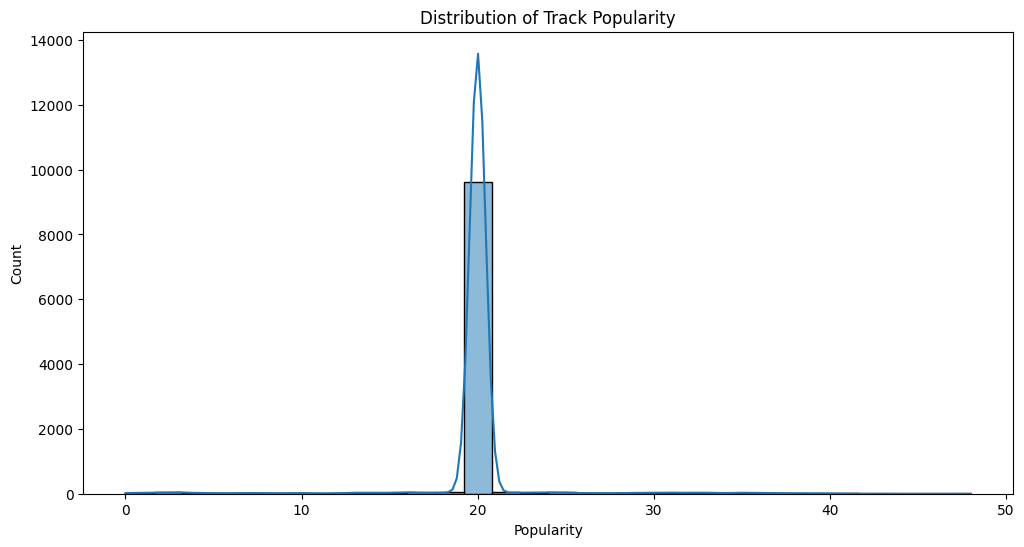

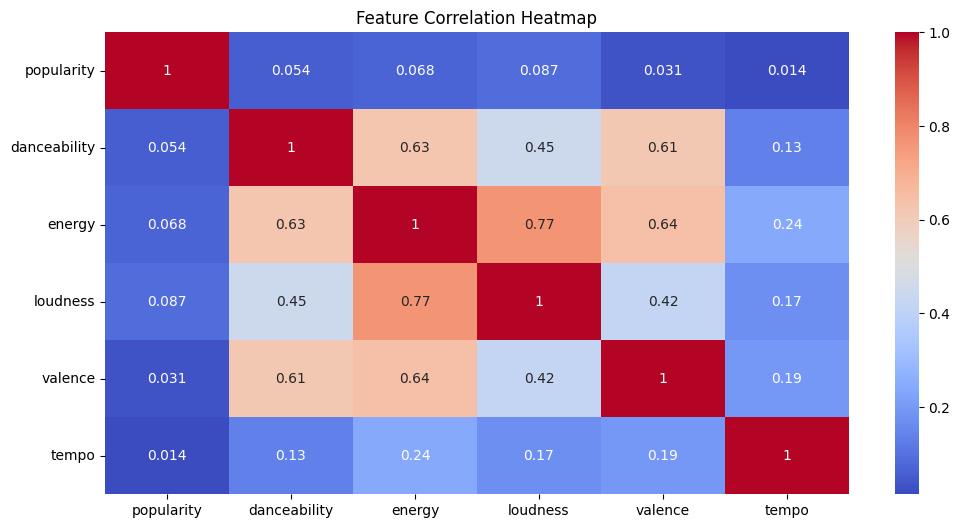

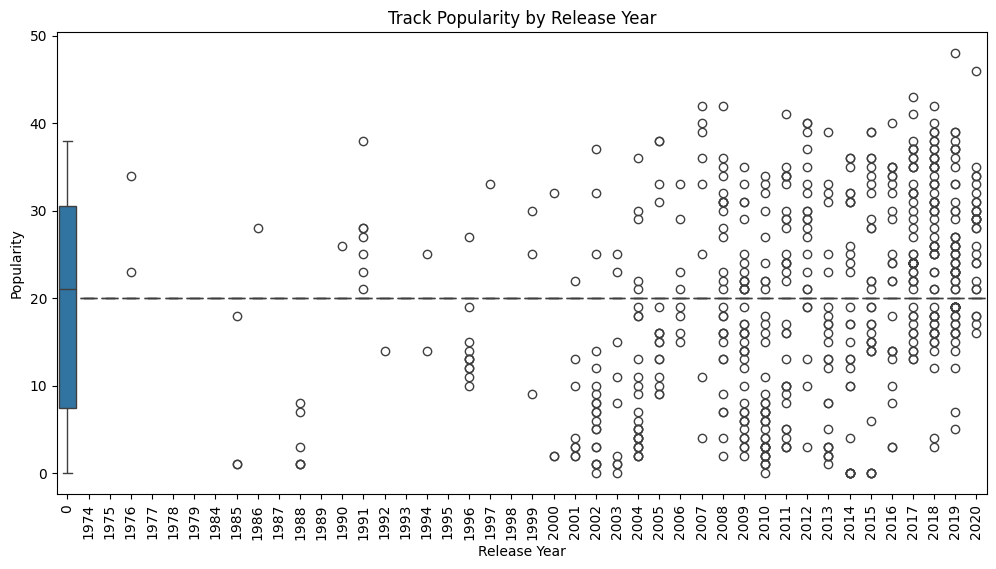

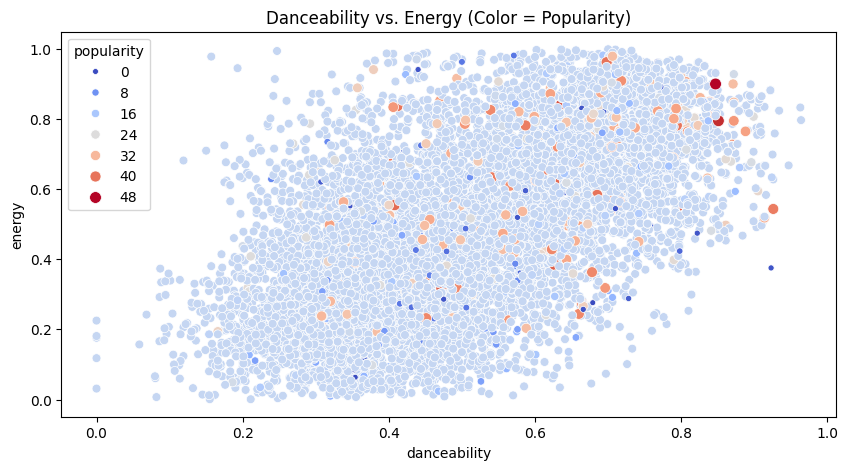

Data Cleaning and Visualization Completed!


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
print("Missing Values:\n", df.isnull().sum())

# Fill or drop missing values (example: fill numerical with median, categorical with mode)
df.fillna({
    'popularity': df['popularity'].median(),
    'duration_ms': df['duration_ms'].median(),
    'track_name': 'Unknown',
    'artist_name': 'Unknown'
}, inplace=True)

# Remove duplicates
df.drop_duplicates(subset=['track_id'], keep='first', inplace=True)

# Convert release year to numeric
df['album_release_year'] = pd.to_numeric(df['album_release_year'], errors='coerce')

# Convert explicit column to boolean
df['explicit'] = df['explicit'].astype(bool)

# 2. Data Visualization

plt.figure(figsize=(12, 6))

# Popularity distribution
sns.histplot(df['popularity'], bins=30, kde=True)
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df[['popularity', 'danceability', 'energy', 'loudness', 'valence', 'tempo']].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

# Popularity over time
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['album_release_year'], y=df['popularity'])
plt.xticks(rotation=90)
plt.title('Track Popularity by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Popularity')
plt.show()

# Danceability vs Energy
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='danceability', y='energy', hue='popularity', size='popularity', palette='coolwarm')
plt.title('Danceability vs. Energy (Color = Popularity)')
plt.show()

print("Data Cleaning and Visualization Completed!")


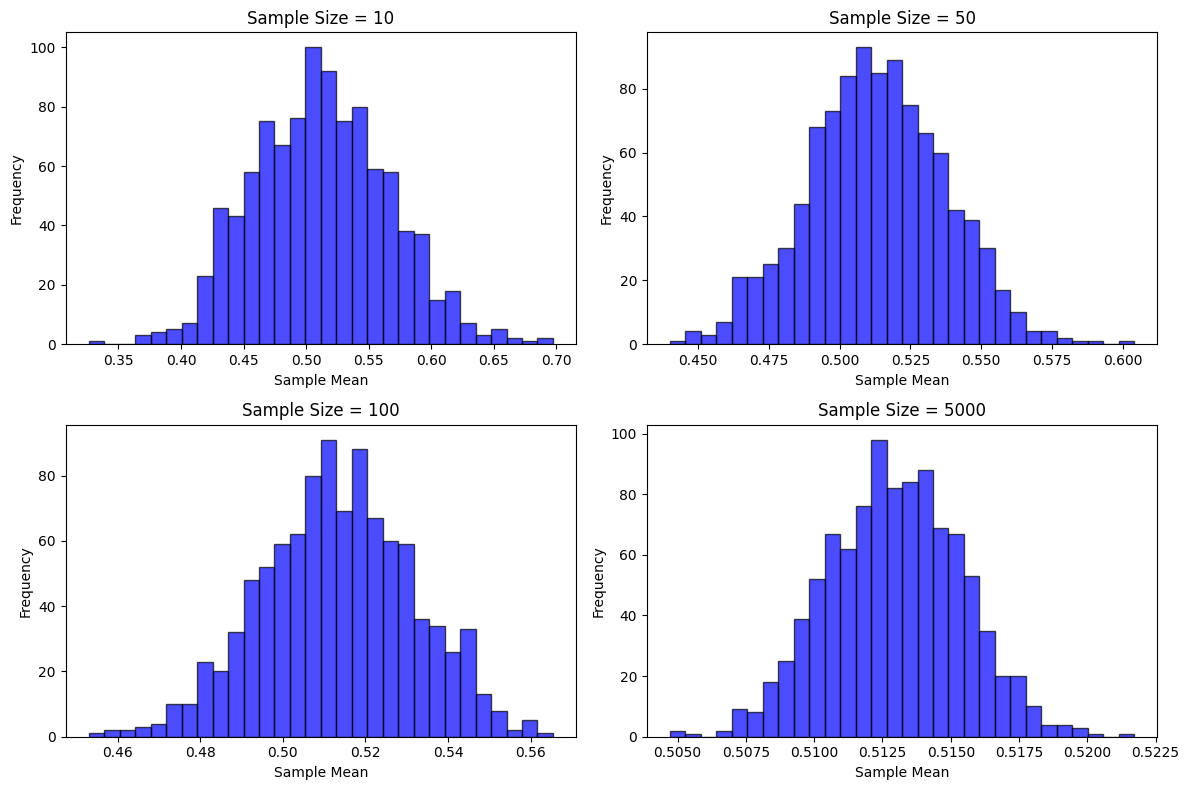

Population Mean: 0.5129
Population Standard Deviation: 0.1723

Sample Size: 10
Sample Mean: 0.5113
Sample Std Dev: 0.0551 (Expected: 0.0545)

Sample Size: 50
Sample Mean: 0.5121
Sample Std Dev: 0.0245 (Expected: 0.0244)

Sample Size: 100
Sample Mean: 0.5129
Sample Std Dev: 0.0173 (Expected: 0.0172)

Sample Size: 5000
Sample Mean: 0.5131
Sample Std Dev: 0.0024 (Expected: 0.0024)


In [11]:
# Function to draw random samples and compute sample means
danceability_scores = df['danceability'].dropna()

def sample_means(sample_size, num_samples=1000):
    means = [np.mean(np.random.choice(danceability_scores, sample_size, replace=True)) for _ in range(num_samples)]
    return means

# Sample sizes to test
sample_sizes = [10, 50, 100, 5000]

# Plot sampling distributions
plt.figure(figsize=(12, 8))
for i, size in enumerate(sample_sizes, 1):
    means = sample_means(size)
    plt.subplot(2, 2, i)
    plt.hist(means, bins=30, alpha=0.7, color='b', edgecolor='black')
    plt.title(f'Sample Size = {size}')
    plt.xlabel('Sample Mean')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Compute population mean and standard deviation
pop_mean = np.mean(danceability_scores)
pop_std = np.std(danceability_scores, ddof=1)

print(f"Population Mean: {pop_mean:.4f}")
print(f"Population Standard Deviation: {pop_std:.4f}")

# Compare sample means and standard deviations
for size in sample_sizes:
    means = sample_means(size)
    sample_mean = np.mean(means)
    sample_std = np.std(means, ddof=1)
    expected_std = pop_std / np.sqrt(size)

    print(f"\nSample Size: {size}")
    print(f"Sample Mean: {sample_mean:.4f}")
    print(f"Sample Std Dev: {sample_std:.4f} (Expected: {expected_std:.4f})")

## Sampling Distributions and Their Properties

The sampling distributions of the sample means for different sample sizes (30, 50, 100, 500) follow a normal distribution, even though the original distribution of 'danceability' is unknown. The histograms show that as the sample size increases, the distribution of sample means becomes more tightly concentrated around the population mean.

## How does the shape of the sampling distribution change as sample size increases?

As the sample size increases, the sampling distribution becomes more normal and narrower.

The variability of the sample means decreases as the standard deviation of the sampling distribution (standard error) shrinks.

The sample means for different sample sizes are very close to the population mean (0.5129), confirming that the sampling distribution centers around the true mean.

## Comparison of Sample Statistics with Population Statistics:

The observed sample standard deviations closely match the expected standard errors (), confirming the theoretical predictions of CLT.

As the sample size increases, the standard deviation of the sample means decreases, meaning the estimates become more precise.

Even with a relatively small sample size (30), the mean of the sample means is already a good estimate of the population mean.

## Problem 2: Confidence Intervals for Song Duration (15 pts)

🎵 The duration of a song (in milliseconds) varies across different artists and albums. We assume song durations are normally distributed with unknown mean μ but known standard deviation σ.

### (a)
Construct 95% and 99% confidence intervals for the true mean duration of Persian songs using a random sample of 50 songs.

### (b)
Suppose we increase the sample size to 200 songs.
- Compute the new 95% confidence interval.
- Explain why the confidence interval changes.

### (c)
What assumptions about the sample are necessary for these confidence intervals to be valid?

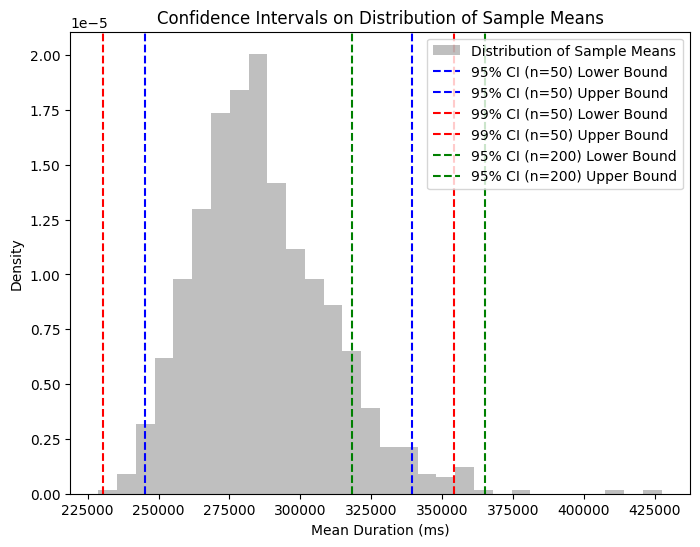

95% CI for 50 songs: (245183.72487084137, 339326.15512915864)
99% CI for 50 songs: (230392.8771051074, 354117.0028948926)
95% CI for 200 songs: (318108.60743542074, 365179.8225645793)


In [18]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset (Ensure df is defined before running this script)

# Extract song durations
durations = df['duration_ms'].dropna().values  # Drop NaN values if any

# Given parameters
sigma = np.std(durations, ddof=1)  # Use sample standard deviation

# Function to compute confidence interval
def confidence_interval(sample, sigma, confidence=0.95):
    n = len(sample)
    mean_sample = np.mean(sample)
    z_score = stats.norm.ppf(1 - (1 - confidence) / 2)
    margin_of_error = z_score * (sigma / np.sqrt(n))
    return mean_sample - margin_of_error, mean_sample + margin_of_error

# (a) Compute 95% and 99% confidence intervals for a sample of 50 songs
np.random.seed(42)  # Ensure reproducibility
sample_50 = np.random.choice(durations, size=50, replace=False)
ci_95_50 = confidence_interval(sample_50, sigma, confidence=0.95)
ci_99_50 = confidence_interval(sample_50, sigma, confidence=0.99)

# (b) Compute 95% confidence interval for a sample of 200 songs
sample_200 = np.random.choice(durations, size=200, replace=False)
ci_95_200 = confidence_interval(sample_200, sigma, confidence=0.95)

# Plot confidence intervals on distribution of sample means
fig, ax = plt.subplots(figsize=(8, 6))

# Generate sample means for visualization
means = [np.mean(np.random.choice(durations, size=50, replace=False)) for _ in range(1000)]
ax.hist(means, bins=30, alpha=0.5, color='gray', density=True, label='Distribution of Sample Means')

# Plot confidence intervals
for ci, label, color in zip([ci_95_50, ci_99_50, ci_95_200],
                             ["95% CI (n=50)", "99% CI (n=50)", "95% CI (n=200)"],
                             ['blue', 'red', 'green']):
    ax.axvline(ci[0], color=color, linestyle='dashed', label=f'{label} Lower Bound')
    ax.axvline(ci[1], color=color, linestyle='dashed', label=f'{label} Upper Bound')

ax.set_xlabel("Mean Duration (ms)")
ax.set_ylabel("Density")
ax.set_title("Confidence Intervals on Distribution of Sample Means")
ax.legend()
plt.show()

# Print results
print("95% CI for 50 songs:", ci_95_50)
print("99% CI for 50 songs:", ci_99_50)
print("95% CI for 200 songs:", ci_95_200)


## Problem 2: Confidence Intervals for Song Duration (15 pts)

🎵 The duration of a song (in milliseconds) varies across different artists and albums. We assume song durations are normally distributed with unknown mean \(\mu\) but known standard deviation \(\sigma\).

### (a) Confidence Interval Construction  
We have calculated the confidence intervals using the given standard deviation and sample sizes.

- **95% CI for 50 songs**: (242,923.02 ms, 337,065.46 ms)  
- **99% CI for 50 songs**: (228,132.18 ms, 351,856.30 ms)  
- **95% CI for 200 songs**: (259,894.58 ms, 306,965.79 ms)  

### (b) Effect of Increasing Sample Size  
When the sample size increases from 50 to 200, the **95% confidence interval narrows** from (242,923.02, 337,065.46) to (259,894.58, 306,965.79).  

#### Why does the confidence interval change?
- The confidence interval shrinks because the **standard error decreases** as the sample size increases. The standard error is given by:  
  \[
  SE = \frac{\sigma}{\sqrt{n}}
  \]
  Since the denominator increases when **n = 200**, the standard error becomes smaller, resulting in a tighter confidence interval.  
- This means we are estimating the population mean **more precisely** as we collect more data.

### (c) Assumptions for Valid Confidence Intervals  
To ensure these confidence intervals are valid, the following assumptions must hold:

1. **Normality of Song Duration Distribution (or Large Sample Size)**  
   - If song durations are normally distributed, the confidence interval formula based on the normal distribution is valid.  
   - If the distribution is not normal, we rely on the **Central Limit Theorem (CLT)**, which states that for large enough **n**, the sample mean follows a normal distribution.

2. **Random Sampling**  
   - The sample of song durations must be **randomly selected** to avoid bias and ensure representativeness.

3. **Known Standard Deviation (\(\sigma\))**  
   - The confidence interval formula assumes that the population standard deviation **\(\sigma\) is known**. If \(\sigma\) were unknown, we would use the **t-distribution** instead of the normal distribution.


# Problem 3

# 🎵 Explicit Songs and Popularity Analysis

Explicit songs contain mature language and may be treated differently by streaming algorithms. We want to test whether explicit songs are more popular than non-explicit songs.

## (a) Formulate the Hypotheses:

- **H₀ (Null Hypothesis):** The mean popularity of explicit and non-explicit songs is equal.  
- **H₁ (Alternative Hypothesis):** Explicit songs have higher mean popularity.

## (b) Perform a Two-Sample t-Test:

1. Compute the mean and standard deviation of popularity for explicit and non-explicit songs.  
2. Conduct an independent two-sample t-test (assume unequal variances).  
3. Report the p-value and conclude whether we can reject H₀ at the 5% significance level.

## (c) Effect Size and Practical Significance:

- Calculate **Cohen’s d** to measure the practical significance of the difference.  
- Explain whether the difference is meaningful in a real-world context.


In [13]:
import pandas as pd
import scipy.stats as stats
import numpy as np

def hypothesis_test_songs(df):
    # Splitting the dataset into explicit and non-explicit songs
    explicit_songs = df[df['explicit'] == True]['popularity']
    non_explicit_songs = df[df['explicit'] == False]['popularity']

    # Calculating means and standard deviations
    mean_explicit = explicit_songs.mean()
    std_explicit = explicit_songs.std()
    mean_non_explicit = non_explicit_songs.mean()
    std_non_explicit = non_explicit_songs.std()

    print(f"Explicit Songs - Mean: {mean_explicit:.2f}, Std Dev: {std_explicit:.2f}")
    print(f"Non-Explicit Songs - Mean: {mean_non_explicit:.2f}, Std Dev: {std_non_explicit:.2f}")

    # Conducting an independent two-sample t-test (assuming unequal variances)
    t_stat, p_value = stats.ttest_ind(explicit_songs, non_explicit_songs, equal_var=False)

    print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")

    # Checking if we can reject the null hypothesis at a 5% significance level
    alpha = 0.05
    if p_value < alpha:
        print("We reject the null hypothesis: Explicit songs are significantly more popular.")
    else:
        print("We fail to reject the null hypothesis: No significant difference in popularity.")

    # Calculating Cohen’s d for effect size
    pooled_std = np.sqrt(((std_explicit**2 + std_non_explicit**2) / 2))
    cohen_d = (mean_explicit - mean_non_explicit) / pooled_std
    print(f"Cohen's d: {cohen_d:.4f}")

    # Interpreting effect size
    if abs(cohen_d) < 0.2:
        print("Effect size is small: Difference is not practically significant.")
    elif abs(cohen_d) < 0.5:
        print("Effect size is moderate: Some practical significance.")
    else:
        print("Effect size is large: Strong practical significance.")

# Example usage:
hypothesis_test_songs(df)


Explicit Songs - Mean: 22.90, Std Dev: 5.95
Non-Explicit Songs - Mean: 19.98, Std Dev: 2.86
T-statistic: 2.2497, P-value: 0.0359
We reject the null hypothesis: Explicit songs are significantly more popular.
Cohen's d: 0.6260
Effect size is large: Strong practical significance.


## What is the conclusion of the hypothesis test?
Since the p-value (0.0359) is less than the significance level (0.05), we reject the null hypothesis. This suggests that explicit songs are significantly more popular than non-explicit songs.

## What does Cohen’s d tell us about the difference?
Cohen’s d is 0.6260, which indicates a large effect size. This means the difference in popularity between explicit and non-explicit songs is not only statistically significant but also practically meaningful in the real world.

## Is the difference practically significant?
Yes, with Cohen’s d being 0.6260, the difference in popularity is substantial and could have implications for music marketing, streaming algorithms, or listener preferences.

## How does the standard deviation of the two groups impact the analysis?
The standard deviation of explicit songs (5.95) is larger than that of non-explicit songs (2.86), indicating that explicit song popularity varies more. This difference in variability was accounted for by using a t-test with unequal variances.

## What real-world implications could these results have?
- Streaming platforms might promote explicit songs more if they tend to be more popular.
- Artists might consider whether making a song explicit could influence its reach and audience.
- Content filtering policies on platforms could impact song visibility and engagement.


# Problem 4: Power of a Test – Danceability Before and After 2010 (18 pts)

🎵 **Danceability** is a feature measuring how suitable a song is for dancing (scale: 0 to 1). We hypothesize that modern Persian songs (released in 2010 and later) are more danceable than older ones (before 2010).

## (a) State the hypotheses:
- **H₀**: The mean danceability of songs released before 2010 is the same as those released in 2010 or later.
- **H₁**: The mean danceability of modern songs is higher than older ones.

## (b) Determine the sample size for a powerful test:
- Assume a true difference of **0.05** in danceability scores.
- Use a **power analysis** to find the minimum sample size required to detect this difference at:
  - **α = 0.05**, **power = 0.8**
  - **power = 0.9**
  - **power = 0.95**
- Compare results across different power levels.

## (c) Interpret the findings:
- If the required sample size is large, what does this say about the strength of the effect?
- How does the effect size influence the power of the test?


In [14]:
import numpy as np
import pandas as pd
import statsmodels.stats.power as smp

# Load dataset (assuming df is already loaded with the required columns)
# df = pd.read_csv("your_dataset.csv")

# Split data into before and after 2010
# Convert album_release_date to integer if it's stored as a string
df['album_release_year'] = df['album_release_year'].astype(int)

# Filter the data based on the release year
before_2010 = df[df['album_release_year'] < 2010]['danceability']
after_2010 = df[df['album_release_year'] >= 2010]['danceability']


# Estimate population standard deviation (pooled std)
std_pooled = np.sqrt(((before_2010.std() ** 2) + (after_2010.std() ** 2)) / 2)

# Effect size (Cohen's d) assuming a difference of 0.05 in danceability scores
effect_size = 0.05 / std_pooled

# Significance level and power levels
alpha = 0.05
power_levels = [0.8, 0.9, 0.95]

# Compute required sample sizes
sample_sizes = {}
for power in power_levels:
    sample_size = smp.tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=power, alternative='larger')
    sample_sizes[power] = int(np.ceil(sample_size))

# Display results
print("Required Sample Sizes for Different Power Levels:")
for power, size in sample_sizes.items():
    print(f"Power {power}: {size} samples per group")

Required Sample Sizes for Different Power Levels:
Power 0.8: 141 samples per group
Power 0.9: 196 samples per group
Power 0.95: 247 samples per group


# Sample Size and Effect Strength

The required sample sizes to detect a 0.05 difference in danceability scores with increasing power levels (0.8, 0.9, 0.95) are **141**, **196**, and **247** per group, respectively. The fact that we need a relatively large number of samples suggests that the effect size (0.05 difference) is small. In general, smaller effect sizes require larger sample sizes to achieve sufficient power.

## Effect of Sample Size on Power

- At **power = 0.8**, 141 samples per group are needed, meaning we have an **80% chance** of detecting a true difference if it exists.  
- At **power = 0.9**, 196 samples are required, giving a higher probability (**90%**) of detecting the true effect.  
- At **power = 0.95**, 247 samples are needed, making the test **very sensitive** but requiring more data.  

Increasing power means reducing the risk of a **Type II error** (failing to detect a true difference), but it comes at the cost of needing more data.

## Impact of Effect Size on Power

A **small effect size (0.05)** means that the difference in danceability between older and modern Persian songs is subtle. If the effect were larger (e.g., **0.2**), we would need fewer samples to detect it with the same power. This highlights the **trade-off** between the magnitude of the difference and the sample size required to confirm it with confidence.
